In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy  as np
import pandas as pd
from scipy import stats
from statsmodels.graphics.gofplots import qqplot
plt.style.use('ggplot')

In [2]:
train = pd.read_csv('../data/train.csv')
train['Age'] = train['YrSold'] - train['YearBuilt']
train['Re_Age'] = train['YrSold'] - train['YearRemodAdd']
train['LogSalePrice'] = train[['SalePrice']].apply(lambda x: np.log1p(x))

In [3]:
def chk_mv(df):
    mv_bycol = pd.DataFrame( df.isnull().sum(axis=0), columns = ['num_mv'])
    mv_bycol['pct_mv'] = mv_bycol['num_mv']/df.shape[0]
    mv_bycol = mv_bycol.sort_values('num_mv', ascending=False)
    mv_by_col = mv_bycol[mv_bycol['num_mv'] > 0]
    return mv_by_col

In [4]:
mv_cnt = chk_mv(train)
mv_cnt

,num_mv,pct_mv
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageCond,81,0.055479


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


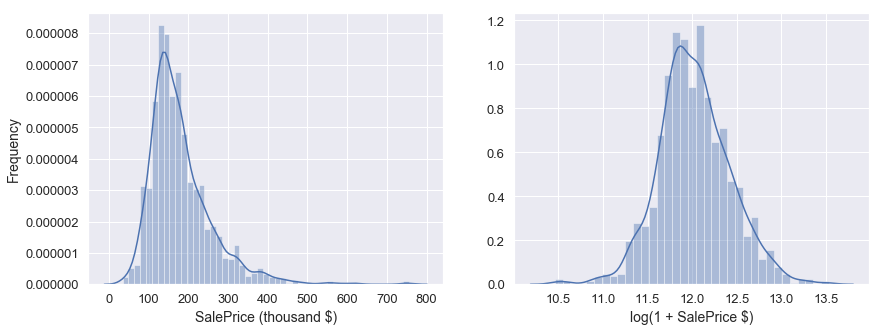

In [5]:
# distribution of target variable: price
sns.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, figsize=(14,5))
g1 = sns.distplot(train['SalePrice'], ax = ax1)
xlabels = ['{:,.0f}'.format(x) for x in g1.get_xticks()/1000]
g1.set_xticklabels(xlabels)
g1.set_xlabel("SalePrice (thousand $)")
g1.set_ylabel("Frequency")
g2 = sns.distplot(train['LogSalePrice'], ax = ax2)
g2.set_xlabel("log(1 + SalePrice $)")
plt.savefig("../documentation/blog/hist_target.pdf")

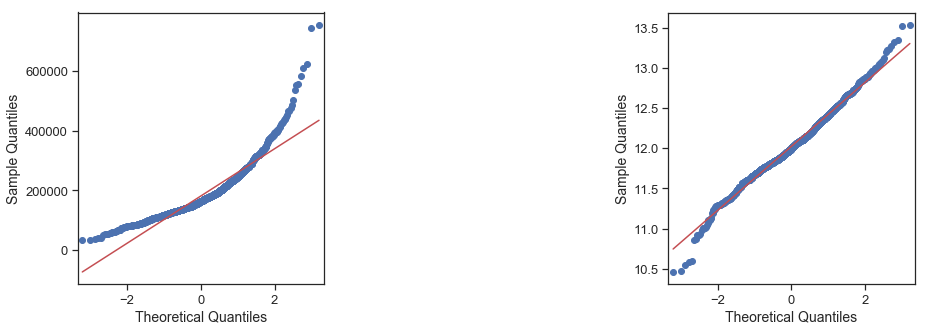

In [6]:
sns.set_style("ticks")
fig = plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(131)
qqplot(train['SalePrice'],line='s', ax = ax1)
ax2 = fig.add_subplot(133)
qqplot(train['LogSalePrice'], line = 's', ax = ax2)
plt.savefig("../documentation/blog/qq_target.pdf")

In [7]:
train['MoSold'] = train['MoSold'].apply(str)
train['MSSubClass'] = train['MSSubClass'].apply(str)
train.drop(['SalePrice','Id','YrSold','YearBuilt','YearRemodAdd'], axis = 1, inplace=True)

In [8]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'En

In [9]:
train_corrdata = train.copy()
cormat = train_corrdata.corr()

In [10]:
r_price = cormat[['LogSalePrice']].sort_values('LogSalePrice', ascending = False)
r_price[1:11]

,LogSalePrice
OverallQual,0.817185
GrLivArea,0.700927
GarageCars,0.680625
GarageArea,0.650888
TotalBsmtSF,0.612134
1stFlrSF,0.596981
FullBath,0.594771
GarageYrBlt,0.541073
TotRmsAbvGrd,0.534422
Fireplaces,0.489450


In [11]:
r_price[11:16]

,LogSalePrice
MasVnrArea,0.430809
BsmtFinSF1,0.372023
LotFrontage,0.355879
WoodDeckSF,0.334135
OpenPorchSF,0.321053


In [12]:
r1_price = cormat[['LogSalePrice']].sort_values('LogSalePrice')
r1_price[0:4]

,LogSalePrice
Age,-0.587290
Re_Age,-0.568136
EnclosedPorch,-0.149050
KitchenAbvGr,-0.147548


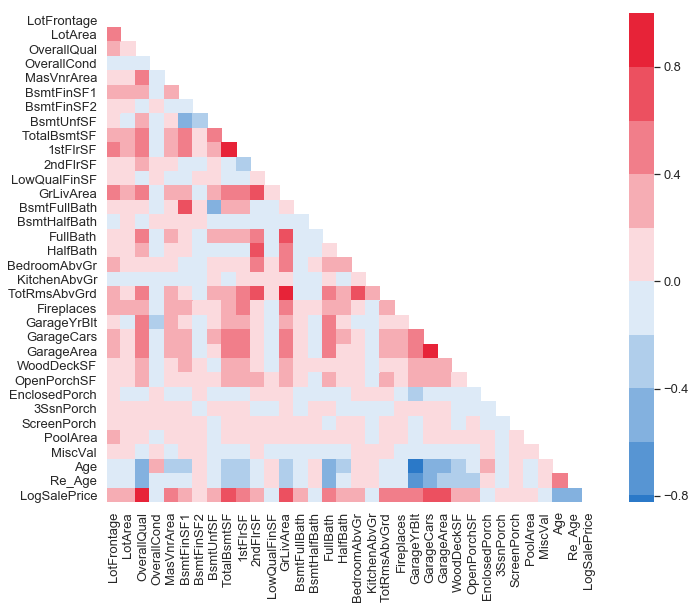

In [13]:
# discretized heatmap
sns.set_style('white')
cmap = sns.diverging_palette(250, 10, s = 90, n = 10)
mask = np.zeros_like(cormat, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (12,9))
sns.heatmap(cormat, mask = mask, cmap = cmap, center = 0, cbar=True, square = True, fmt = '.2f')

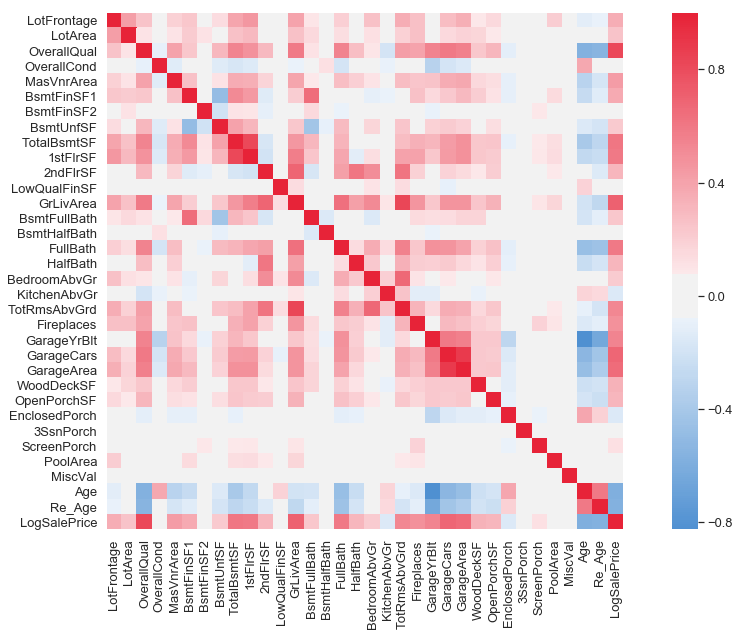

In [14]:
# continuous colormap
sns.set_style('white')
cmap = sns.diverging_palette(250, 10, s = 90, sep = 20, as_cmap = True)
#mask = np.zeros_like(cormat, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

plt.figure(figsize = (14,9))
sns.heatmap(cormat, cmap = cmap, center = 0, cbar=True, square = True, fmt = '.2f')
plt.tight_layout()
plt.savefig("../documentation/blog/corr-basecase-full.pdf")

In [15]:
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    #print(pd.crosstab(x,y))
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [16]:
num_col = cormat.columns
cat_col = sorted(list( set(train.columns) - set(num_col)))
len(cat_col)

45

In [17]:
for var in ['Condition1','Condition2','MSSubClass']:
    cat_col.remove(var)
len(cat_col)

42

In [18]:
# use the cat_cols from basecase data
import pickle
with open('basecase/train.pickle', 'rb') as f:
    X_train, temp, y_train, temp1 = pickle.load(f)

catdata = pd.concat([X_train[cat_col], train[['Condition1','Condition2','MSSubClass']]], axis = 1)
catdata.PoolQC = catdata.PoolQC.apply(str)
catdata.dtypes
catdata.shape

(1460, 45)

In [19]:
cat_col2 = catdata.columns
cramers_cormat = np.zeros((len(cat_col2),len(cat_col2)))
for i, vari in enumerate(cat_col2):
    #print(i, vari)
    for j, varj in enumerate(cat_col2):
        #print(j, varj)
        cramers_cormat[i,j] = cramers_v(catdata[vari],catdata[varj])
cramers_cormat

array([[1.        , 0.15388282, 0.07593271, ..., 0.        , 0.        ,
        0.11019768],
       [0.15388282, 1.        , 0.15329466, ..., 0.02020964, 0.08144198,
        0.33195206],
       [0.07593271, 0.15329466, 1.        , ..., 0.0034338 , 0.        ,
        0.09292885],
       ...,
       [0.        , 0.02020964, 0.0034338 , ..., 1.        , 0.21005886,
        0.1107882 ],
       [0.        , 0.08144198, 0.        , ..., 0.21005886, 1.        ,
        0.15743188],
       [0.11019768, 0.33195206, 0.09292885, ..., 0.1107882 , 0.15743188,
        1.        ]])

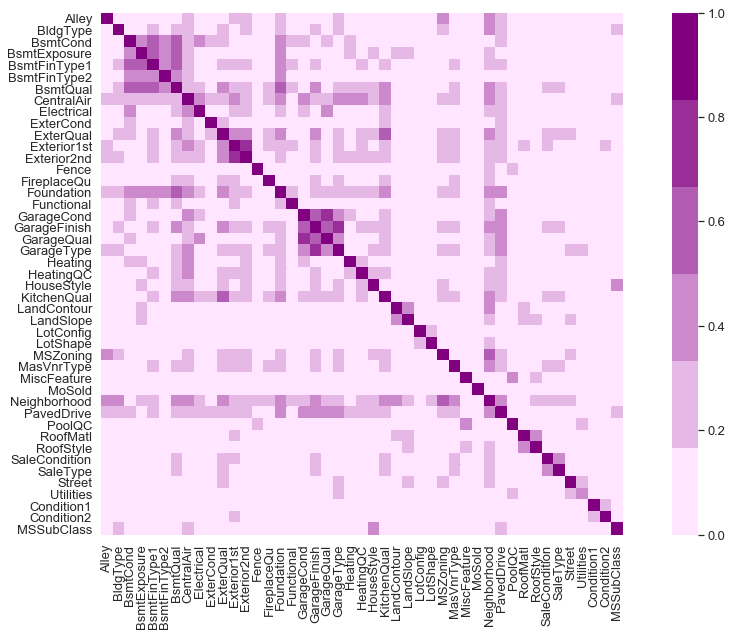

In [20]:
sns.set_style('white')
plt.figure(figsize = (14,9))
sns.heatmap(cramers_cormat, cmap = sns.light_palette("purple"), cbar=True, square = True, xticklabels = cat_col2, yticklabels = cat_col2, fmt = '.2f')
plt.tight_layout()
plt.savefig("../documentation/blog/catcorr-basecase.pdf")

In [21]:
def chk_mv(df):
    mv_bycol = pd.DataFrame( df.isnull().sum(axis=0), columns = ['num_mv'])
    mv_bycol['pct_mv'] = mv_bycol['num_mv']/df.shape[0]
    mv_bycol = mv_bycol.sort_values('num_mv', ascending=False)
    mv_by_col = mv_bycol[mv_bycol['num_mv'] > 0]
    return mv_by_col

In [22]:
mv_cnt = chk_mv(train)
mv_cnt

,num_mv,pct_mv
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageQual,81,0.055479
GarageType,81,0.055479
GarageFinish,81,0.055479
GarageYrBlt,81,0.055479


In [23]:
mv_cnt.shape

(19, 2)

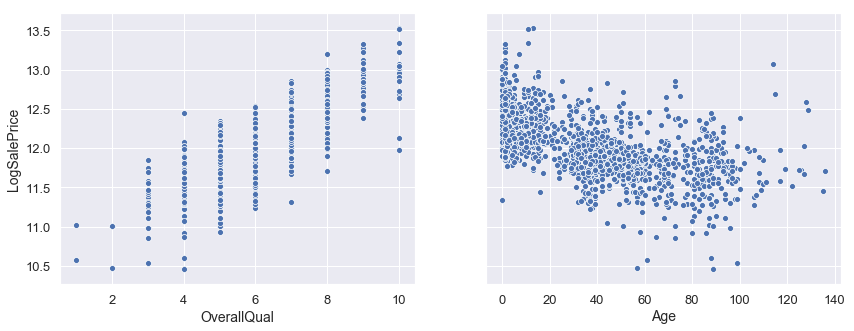

In [24]:
# example of scatterplot
sns.set()
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey = True, figsize=(14,5))
sns.scatterplot(x = train['OverallQual'], y = train['LogSalePrice'], ax = ax1)
sns.scatterplot(x = train['Age'], y = train['LogSalePrice'], ax = ax2)
plt.savefig("../documentation/blog/scatter-basecase.pdf")

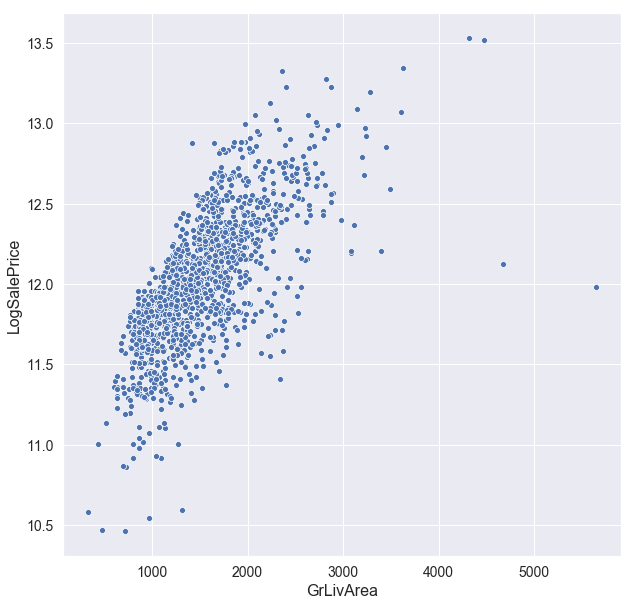

In [27]:
# outlier
plt.figure(figsize = (10,10))
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14
sns.scatterplot(x = train['GrLivArea'], y = train['LogSalePrice'])
plt.savefig("../documentation/blog/outlier.pdf")

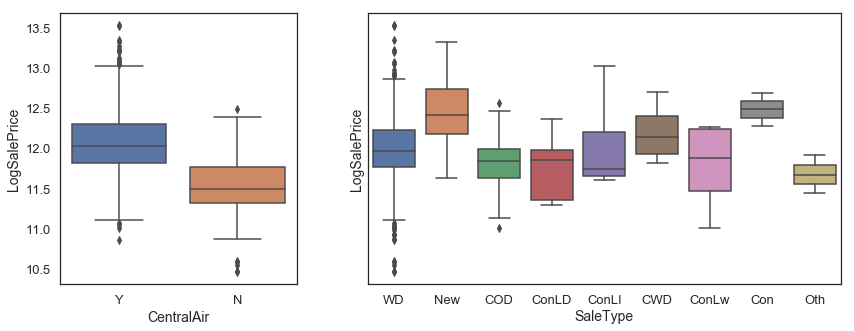

In [230]:
# example of boxplot
sns.set_style('white')
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 13
plt.rcParams['ytick.labelsize'] = 13
fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharey = True, gridspec_kw={'width_ratios': [1, 2]}, figsize=(14,5))
sns.boxplot(x = train['CentralAir'], y = train['LogSalePrice'], ax = ax1)
sns.boxplot(x = train['SaleType'], y = train['LogSalePrice'], ax = ax2)
#sns.boxplot(x = train['MSZoning'], y = train['LogSalePrice'], ax = ax3)
plt.savefig("../documentation/blog/boxplot-basecase.pdf")

In [232]:
print(train['SaleType'].value_counts())
print(train['CentralAir'].value_counts())

WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64
Y    1365
N      95
Name: CentralAir, dtype: int64


[Text(0,0,'CollgCr'),
 Text(0,0,'Veenker'),
 Text(0,0,'Crawfor'),
 Text(0,0,'NoRidge'),
 Text(0,0,'Mitchel'),
 Text(0,0,'Somerst'),
 Text(0,0,'NWAmes'),
 Text(0,0,'OldTown'),
 Text(0,0,'BrkSide'),
 Text(0,0,'Sawyer'),
 Text(0,0,'NridgHt'),
 Text(0,0,'NAmes'),
 Text(0,0,'SawyerW'),
 Text(0,0,'IDOTRR'),
 Text(0,0,'MeadowV'),
 Text(0,0,'Edwards'),
 Text(0,0,'Timber'),
 Text(0,0,'Gilbert'),
 Text(0,0,'StoneBr'),
 Text(0,0,'ClearCr'),
 Text(0,0,'NPkVill'),
 Text(0,0,'Blmngtn'),
 Text(0,0,'BrDale'),
 Text(0,0,'SWISU'),
 Text(0,0,'Blueste')]

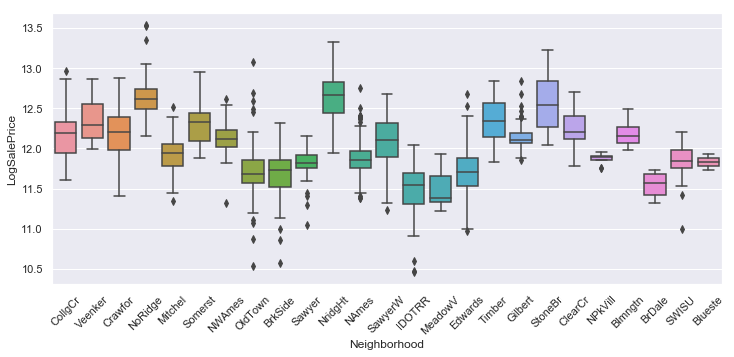

In [216]:
plt.figure(figsize = (12,5))
g = sns.boxplot(x = train['Neighborhood'], y = train['LogSalePrice'])
g.set_xticklabels(labels = g.get_xticklabels(), rotation=45)

In [5]:
from sklearn import ensemble
from sklearn.model_selection import cross_validate, KFold
import pickle
from sklearn.preprocessing import StandardScaler, RobustScaler

def load_traindata(encodetype = 'dummy'):
    with open('basecase/train.pickle', 'rb') as f:
        if encodetype == 'dummy':
            temp, X, y_train, temp1 = pickle.load(f)
        elif encodetype == 'le':
            temp, temp1, y_train, X = pickle.load(f)
        else:
            print("returning un-encoded features")
            X, temp, y_train, temp1 = pickle.load(f)
            
    # loading it as y_train gives a panda series, and causes error in indexing by CV split
    # convert to numpy array solves it
    y = y_train.values 
    return X, y

X, y = load_traindata(encodetype ='le')
cols = X.columns 

# standardize x_train data
scaler = RobustScaler()
X = scaler.fit_transform(X)

outer_cv = KFold(n_splits=5, shuffle=True, random_state = 1) 

In [8]:
best_RF1 = ensemble.RandomForestRegressor(n_estimators = 100, max_depth = 14, max_features = 26)
RF1_cv = cross_validate(best_RF1, X, y, return_train_score = True, scoring = 'neg_mean_squared_error', cv=outer_cv)

In [14]:
testRMSE = np.sqrt(-RF1_cv['test_score'])
trainRMSE = np.sort(-RF1_cv['train_score'])
print(np.mean(testRMSE))
print(np.mean(trainRMSE))

0.13292423185898644
0.0026636951817347173


In [20]:
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
X, y = load_traindata( encodetype ='le')
cols = X.columns 
xgtrain = xgb.DMatrix(data=X, label = y)
xgb1 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.8, gamma=0, importance_type='total_gain',
       learning_rate=0.01, max_delta_step=0, max_depth=3,
       min_child_weight=4, missing=None, 
       n_estimators=3320, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.8)
xgb1_cv = cross_validate(xgb1,X, y, return_train_score = True, scoring = 'neg_mean_squared_error', cv=outer_cv )

In [21]:
testRMSE = np.sqrt(-xgb1_cv['test_score'])
trainRMSE = np.sort(-xgb1_cv['train_score'])
print(np.mean(testRMSE))
print(np.mean(trainRMSE))

0.11237853626811475
0.002520936127261392


In [ ]:
# feature importance
def FI_lasso():
    """
    Add a random column to the feature data, and run the optimized lasso model
    Any feature that ranks lower in importance than the random column has no significance for prediction with this model
    """
    X, y = load_traindata()
    cols = list(X.columns)
    
    lasso = Lasso(max_iter = 10000, alpha =  0.004498433)
    scaler = RobustScaler()
    X = scaler.fit_transform(X)
    
    lasso.fit(X, y)
    
    coefs = sorted(list(zip(cols,lasso.coef_)),key=lambda t: abs(t[1]), reverse = True)
    coefs = pd.DataFrame( coefs, columns = ['Feature', 'Coef'] )
    return coefs

In [24]:
# average Train and Test CV scores for optimized random forest model on the engineered dataset
from sklearn import ensemble
from sklearn.model_selection import cross_validate, KFold
import pickle
from sklearn.preprocessing import StandardScaler, RobustScaler

def load_traindata(encodetype = 'dummy'):
    with open('change_02/train.pickle', 'rb') as f:
        if encodetype == 'dummy':
            temp, X, y_train, temp1 = pickle.load(f)
        elif encodetype == 'le':
            temp, temp1, y_train, X = pickle.load(f)
        else:
            print("returning un-encoded features")
            X, temp, y_train, temp1 = pickle.load(f)
            
    # loading it as y_train gives a panda series, and causes error in indexing by CV split
    # convert to numpy array solves it
    y = y_train.values 
    return X, y

X, y = load_traindata(encodetype ='le')
cols = X.columns 

# standardize x_train data
scaler = RobustScaler()
X = scaler.fit_transform(X)

outer_cv = KFold(n_splits=5, shuffle=True, random_state = 1) 
best_RF2 = ensemble.RandomForestRegressor(n_estimators = 250, max_depth = 14, max_features = 16, min_samples_split = 3)
RF2_cv = cross_validate(best_RF2, X, y, return_train_score = True, scoring = 'neg_mean_squared_error', cv=outer_cv)

testRMSE = np.sqrt(-RF2_cv['test_score'])
trainRMSE = np.sort(-RF2_cv['train_score'])
print(np.mean(testRMSE))
print(np.mean(trainRMSE))

0.12068120460548197
0.0022802095905305434


In [25]:
# average Train and Test CV scores for optimized xgboost model on the engineered dataset
import xgboost as xgb
from xgboost.sklearn import XGBRegressor
X, y = load_traindata( encodetype ='le')
cols = X.columns 

xgb2 = XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.65, gamma=0, importance_type='total_gain',
       learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, 
       n_estimators=1996, n_jobs=-1, nthread=None, objective='reg:linear',
       random_state=0, reg_alpha=0, reg_lambda=0.9, scale_pos_weight=1,
       seed=27, silent=True, subsample=0.55)
xgb2_cv = cross_validate(xgb2,X, y, return_train_score = True, scoring = 'neg_mean_squared_error', cv=outer_cv )
testRMSE = np.sqrt(-xgb2_cv['test_score'])
trainRMSE = np.sort(-xgb2_cv['train_score'])
print(np.mean(testRMSE))
print(np.mean(trainRMSE))

0.10777222848460992
0.0009833871883513745
